In [3]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
import os
s = json.load( open('../fbb_matplotlibrc.json') )
pl.rcParams.update(s)

from pandas.tools.plotting import scatter_matrix


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

In [4]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 dictionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9) #%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [5]:
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [6]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
# scatter_matrix (allmales['all'], s=300, figsize=(16, 16), diagonal='kde')

(0, 50000)

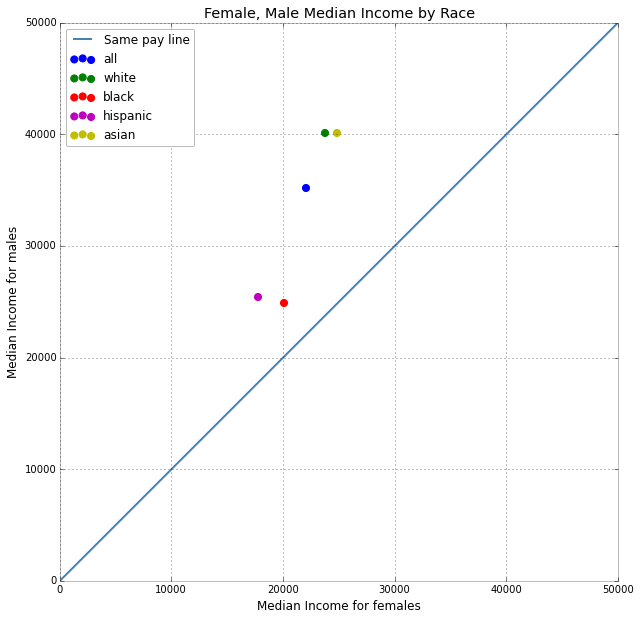

In [8]:
fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)

colors = ['b', 'g', 'r', 'c', 'm'] 
color_id = 0

races = ['all', 'white', 'black', 'hispanic', 'asian']
colors = ['b', 'g', 'r', 'm', 'y']
male_med_income = []
female_med_income = []

for k in races:
    female_med_income.append(allfemales[k]['Median income'][1])
    male_med_income.append(allmales[k]['Median income'][1])
    ax.scatter(allfemales[k]['Median income'][1], allmales[k]['Median income'][1], color=colors[color_id], s=50, label=k)
    color_id += 1
    
ax.set_xlabel('Median Income for females')
ax.set_ylabel('Median Income for males')
ax.set_title('Female, Male Median Income by Race')

ax.plot([0,50000], [0,50000], label="Same pay line")
ax.legend(loc='upper left')
ax.set_xlim(0, 50000)
ax.set_ylim(0, 50000)


In [9]:
import statsmodels.api as sm

X = sm.add_constant(female_med_income)
model = sm.OLS(male_med_income, X)
fit = model.fit()
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Wed, 14 Oct 2015   Prob (F-statistic):             0.0176
Time:                        04:55:16   Log-Likelihood:                -45.843
No. Observations:                   5   AIC:                             95.69
Df Residuals:                       3   BIC:                             94.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2.112e+04   1.15e+04     -1.841      0.1

C:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


In [10]:
intercept0, slope0 = fit.params
print("Slope=%s and intercept=%s" % ( slope0, intercept0))

Slope=2.50117986639 and intercept=-21116.300505


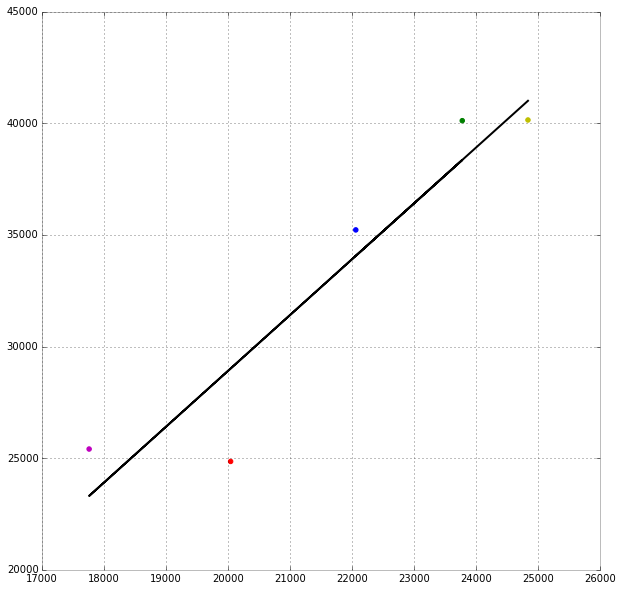

In [11]:
fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
ax.scatter(female_med_income, male_med_income, color=colors)
ax.plot(female_med_income, fit.predict(), 'k')

In [12]:
from scipy import stats

cor = stats.spearmanr(male_med_income, female_med_income)
beta1=cor[0]*np.std(female_med_income)/np.std(male_med_income)
beta0=np.mean(male_med_income)-beta1*np.mean(female_med_income)

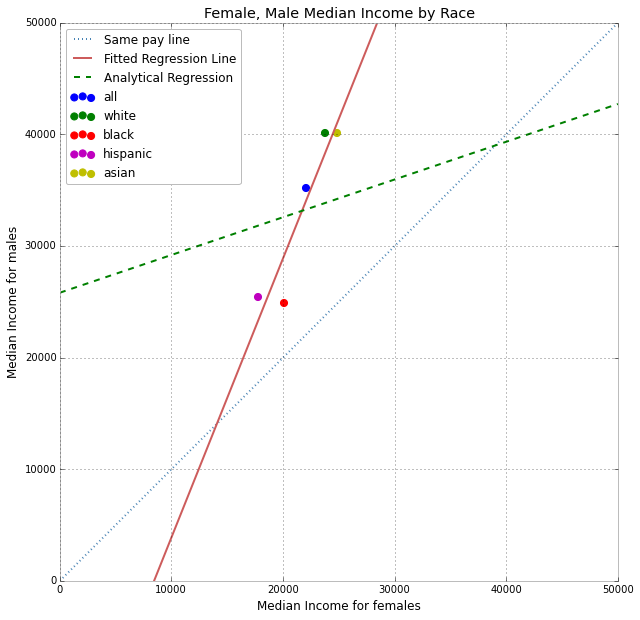

In [23]:
fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)

color_id=0
for k in races:
    female_med_income.append(allfemales[k]['Median income'][1])
    male_med_income.append(allmales[k]['Median income'][1])
    ax.scatter(allfemales[k]['Median income'][1], allmales[k]['Median income'][1], color=colors[color_id], s=50, label=k)
    color_id += 1
    
ax.set_xlabel('Median Income for females')
ax.set_ylabel('Median Income for males')
ax.set_title('Female, Male Median Income by Race')

X = arange(0, 50000, 1)
Y0 = intercept0 + slope0*X

ax.plot([0,50000], [0,50000], linestyle=':', label="Same pay line")
ax.plot(X, Y0, label="Fitted Regression Line", linestyle='-')
ax.plot([0, 50000], [0*beta1+beta0, 50000*beta1+beta0], linestyle='--', label = "Analytical Regression")
ax.set_xlim(0, 50000)
ax.set_ylim(0, 50000)
ax.legend(loc='upper left')




In [14]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [15]:
X = sm.add_constant(all_females[~all_females.mask])
modelA = sm.OLS(all_males[~all_males.mask], X)
fit = modelA.fit()
intercept, slope = fit.params
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        04:55:46   Log-Likelihood:                -1743.6
No. Observations:                 178   AIC:                             3491.
Df Residuals:                     176   BIC:                             3498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.5170    561.569     -0.004      0.9

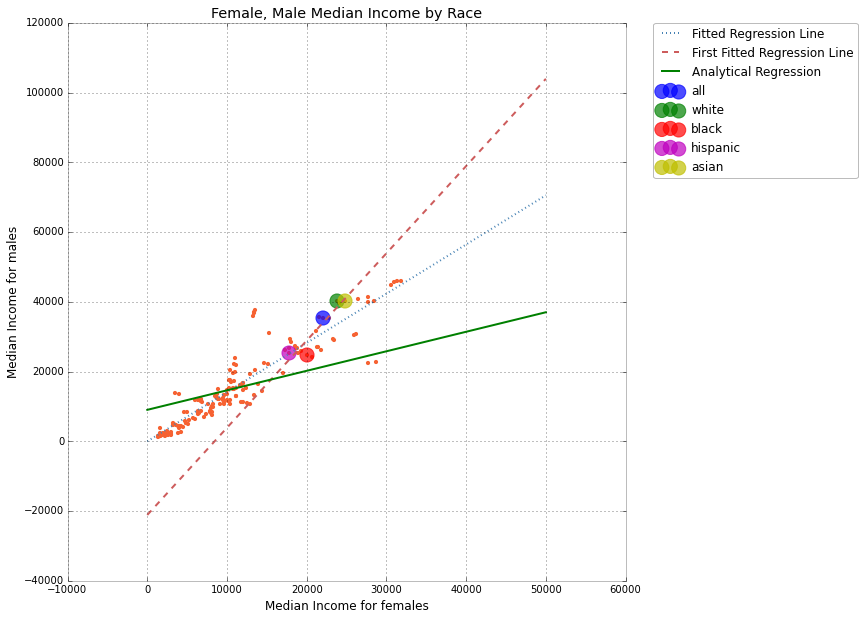

In [37]:
fig = pl.figure(figsize=(10,10)) 
ax2 = fig.add_subplot(111)
    
ax2.set_xlabel('Median Income for females')
ax2.set_ylabel('Median Income for males')
ax2.set_title('Female, Male Median Income by Race')

ax2.scatter(all_females, all_males, s=10, color='#F66232')

X = arange(0, 50000, 1)
Y = intercept + slope*X

cor = stats.spearmanr(all_males, all_females)
beta1=cor[0]*np.std(all_females)/np.std(all_males)
beta0=np.mean(all_males)-beta1*np.mean(all_females)

# ax2.plot([0,50000], [0,50000], linestyle='-', label="Same pay line")
ax2.plot(X, Y, linestyle=':', label="Fitted Regression Line")
ax2.plot(X, Y0, linestyle='--', label="First Fitted Regression Line")
ax2.plot([0, 50000], [0*beta1+beta0, 50000*beta1+beta0], linestyle='-', label = "Analytical Regression")

color_id=0
for k in races:
    ax2.scatter(allfemales[k]['Median income'][1], allmales[k]['Median income'][1], color=colors[color_id], s=200, label=k, alpha=0.7)
    color_id += 1
    
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)